In [6]:
# Load the dataset
file_path = "Energy_consumption_dataset.csv"  # Update with actual file path
data = pd.read_csv(file_path)

In [18]:
print(data.head())

   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
2      1     2  Saturday      No    28.704277  58.907658    1755.715009   
3      1     3  Saturday      No    20.080469  50.371637    1452.316318   
4      1     4  Saturday      No    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  \
0          5        On           Off         2.774699          75.364373   
1          1        On            On        21.831384          83.401855   
2          2       Off           Off         6.764672          78.270888   
3          1       Off            On         8.623447          56.519850   
4          9        On           Off         3.071969          70.811732   

   EnergyPerSqFt  OccupancyPerSqFt  Temp_Humidity_Interaction  
0       0.048135          0.

In [68]:
print(data.isnull().sum())

Month                        0
Hour                         0
DayOfWeek                    0
Holiday                      0
Temperature                  0
Humidity                     0
SquareFootage                0
Occupancy                    0
HVACUsage                    0
LightingUsage                0
RenewableEnergy              0
EnergyConsumption            0
EnergyPerSqFt                0
OccupancyPerSqFt             0
Temp_Humidity_Interaction    0
dtype: int64


In [7]:
# Feature Engineering 
## 1. Energy Efficiency Features
data["EnergyPerSqFt"] = data["EnergyConsumption"] / data["SquareFootage"]
data["OccupancyPerSqFt"] = data["Occupancy"] / data["SquareFootage"]

In [8]:
## 2. Interaction Features
data["Temp_Humidity_Interaction"] = data["Temperature"] * data["Humidity"]

In [9]:
## 3. Polynomial Features (2nd degree)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[["Temperature", "Humidity"]])
poly_columns = [f"Poly_{i}" for i in range(poly_features.shape[1])]
poly_df = pd.DataFrame(poly_features, columns=poly_columns)


In [10]:
# Encode categorical variables
categorical_features = ["DayOfWeek", "Holiday", "HVACUsage", "LightingUsage"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [11]:
# Select numerical features
numerical_features = ["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy", 
                       "EnergyPerSqFt", "OccupancyPerSqFt", "Temp_Humidity_Interaction"]


In [12]:
# Combine numerical, encoded categorical, and polynomial features
X = pd.concat([data[numerical_features], encoded_df, poly_df], axis=1)
y = data["EnergyConsumption"]

In [13]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
print(X_train.head())


      Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
4227    25.478605  52.641827    1089.607222          5         7.929568   
4676    22.573899  55.364801    1445.777387          4        14.214759   
800     25.566609  35.101091    1535.812088          8         3.849354   
3671    20.207940  50.938666    1384.005023          4        11.499814   
4193    20.034558  54.983408    1933.498736          6        16.708976   

      EnergyPerSqFt  OccupancyPerSqFt  Temp_Humidity_Interaction  \
4227       0.084014          0.004589                1341.240336   
4676       0.045156          0.002767                1249.799442   
800        0.053985          0.005209                 897.415894   
3671       0.057044          0.002890                1029.365523   
4193       0.037495          0.003103                1101.568269   

      DayOfWeek_Monday  DayOfWeek_Saturday  ...  DayOfWeek_Tuesday  \
4227               1.0                 0.0  ...                0.0   


In [61]:
print(X_test.head())


      Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
1501    23.115059  30.015975    1424.678701          7        10.320502   
2586    28.416241  44.225105    1805.746167          2        18.375708   
2653    24.545405  48.097899    1506.721568          5        23.018962   
1055    28.849262  30.015975    1867.354237          7        13.906273   
705     21.637690  56.532159    1235.612294          4         3.081125   

      EnergyPerSqFt  OccupancyPerSqFt  Temp_Humidity_Interaction  \
1501       0.059507          0.004913                 693.821029   
2586       0.034766          0.001108                1256.711258   
2653       0.056567          0.003318                1180.582396   
1055       0.050620          0.003749                 865.938731   
705        0.060952          0.003237                1223.225352   

      DayOfWeek_Monday  DayOfWeek_Saturday  ...  DayOfWeek_Tuesday  \
1501               0.0                 0.0  ...                0.0   


In [62]:
print(y_train.head())

4227    91.542420
4676    65.286008
800     82.910470
3671    78.948576
4193    72.495637
Name: EnergyConsumption, dtype: float64


In [63]:
print(y_test.head())

1501    84.778571
2586    62.777773
2653    85.231391
1055    94.525334
705     75.312838
Name: EnergyConsumption, dtype: float64


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel="rbf"),
}


In [48]:
# Training and Evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} R² Score: {r2:.4f}")

# Finding the best model
best_model = max(results, key=results.get)
print(f"\n Best Model: {best_model} with R² Score: {results[best_model]:.4f}")

Linear Regression R² Score: 0.8799
Ridge Regression R² Score: 0.8799
Lasso Regression R² Score: 0.8713
Decision Tree R² Score: 0.9720
Random Forest R² Score: 0.9907
Gradient Boosting R² Score: 0.9748
AdaBoost Regressor R² Score: 0.8138
Support Vector Regression (SVR) R² Score: 0.8429

 Best Model: Random Forest with R² Score: 0.9907


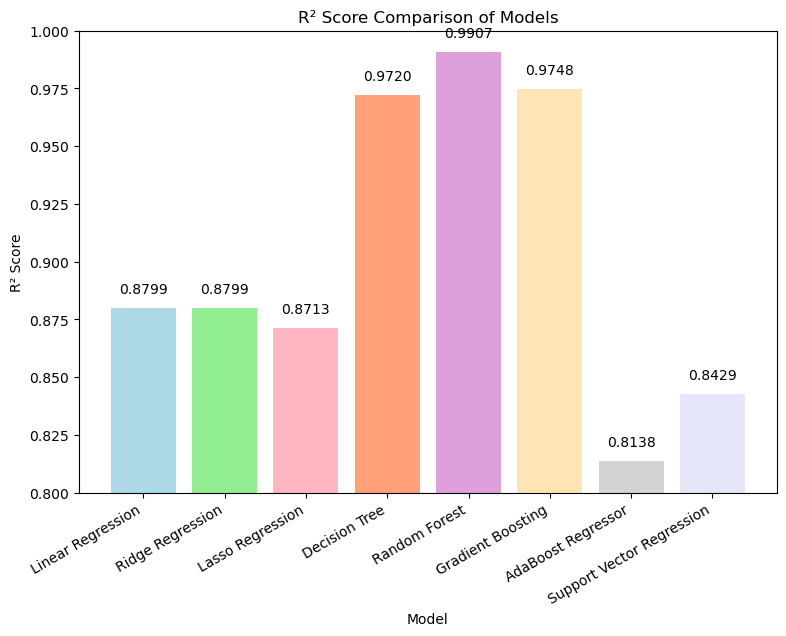

In [56]:
import matplotlib.pyplot as plt

# Data for models and their R² scores
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression', 
    'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'AdaBoost Regressor', 'Support Vector Regression'
]
r2_scores = [0.8799, 0.8799, 0.8713, 0.9720, 0.9907, 0.9748, 0.8138, 0.8429]

# Creating a bar chart
plt.figure(figsize=(9, 6))
colors = ["lightblue", "lightgreen", "lightpink", "lightsalmon", 
          "plum", "moccasin", "lightgray", "lavender"]

plt.bar(models, r2_scores, color=colors)

plt.title('R² Score Comparison of Models')
plt.xlabel('Model')
plt.ylabel('R² Score')

# Displaying the R² scores on top of the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.005, f'{score:.4f}', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.ylim(0.8, 1.0)

plt.show()



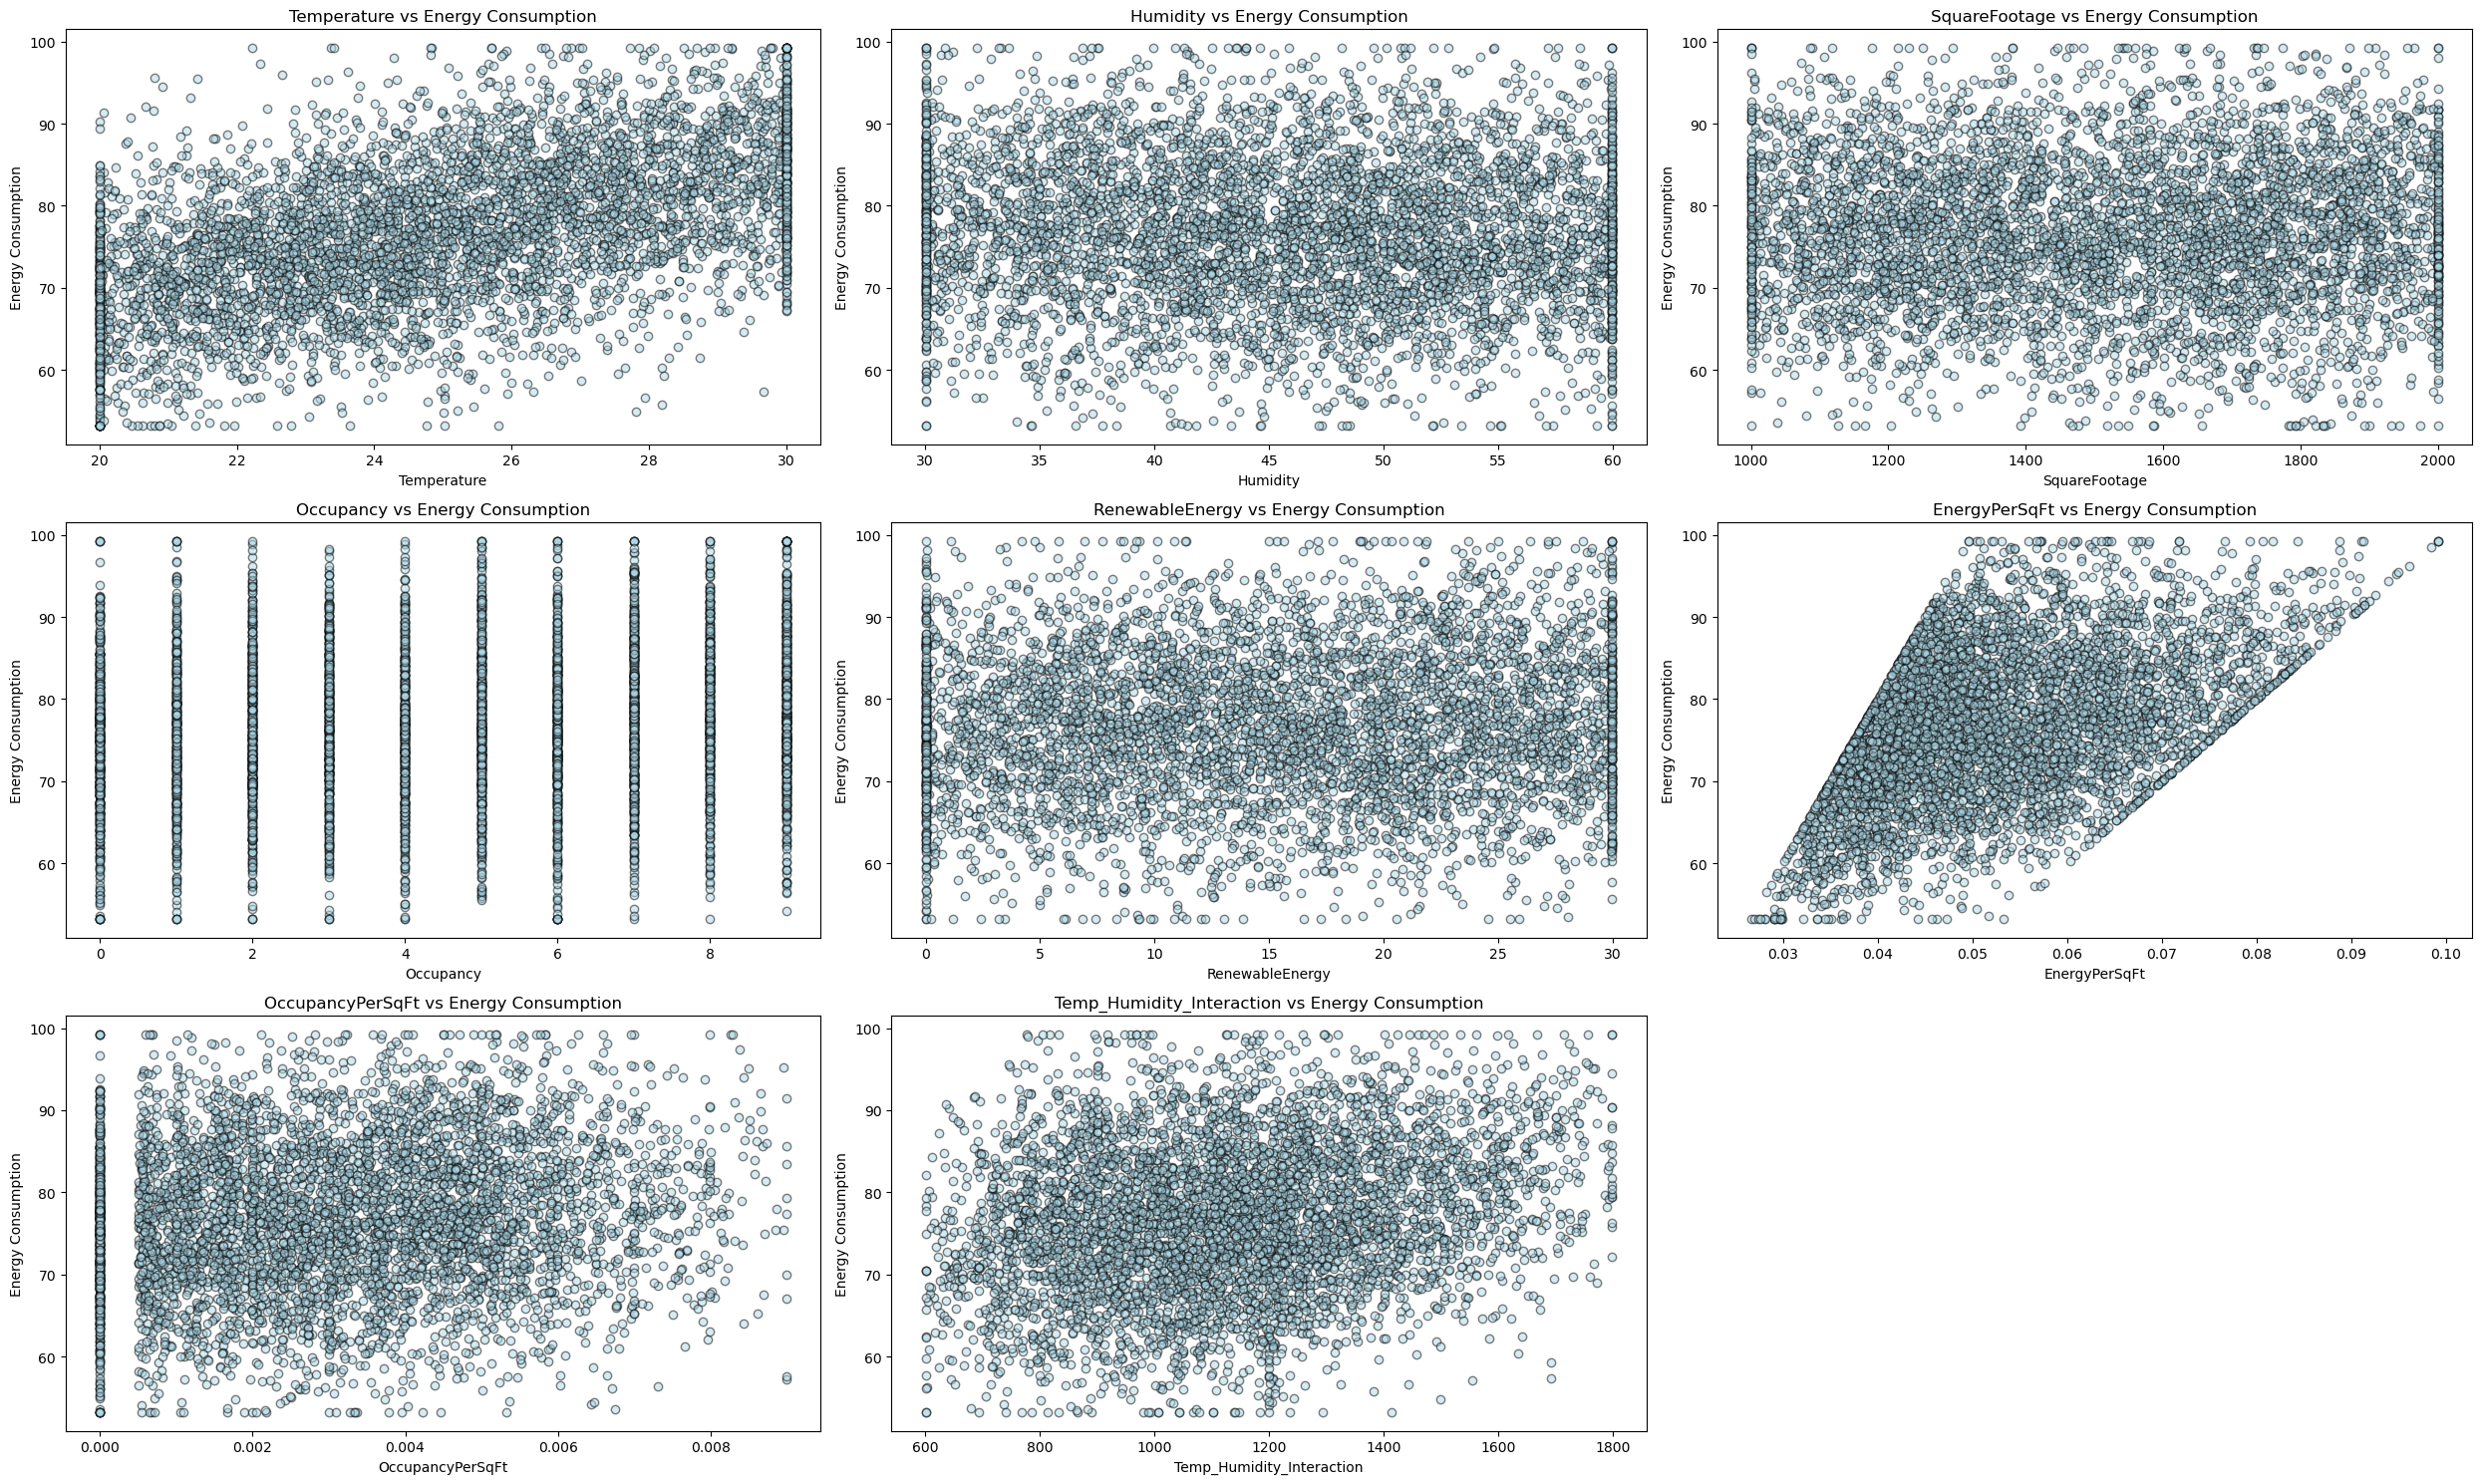

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(data[feature], data["EnergyConsumption"], alpha=0.5, edgecolors="black", color="skyblue")
    plt.xlabel(feature)
    plt.ylabel("Energy Consumption")
    plt.title(f"{feature} vs Energy Consumption")

plt.tight_layout()
plt.show()
